In [82]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import sklearn.metrics as mt
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1
 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1]


Text(0, 0.5, 'feature1')

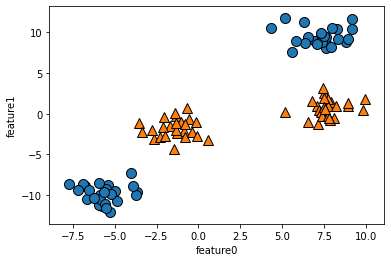

In [83]:
x,y = make_blobs(centers=4,random_state=8)
y %= 2 
print(y)
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.xlabel("feature0")
plt.ylabel("feature1")

C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


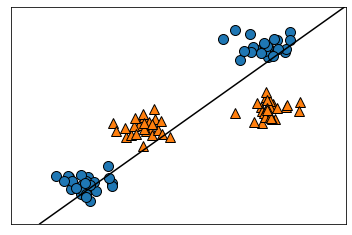

In [84]:
linear_svm  = LinearSVC().fit(x,y)
mglearn.plots.plot_2d_separator(linear_svm,x)
mglearn.discrete_scatter(x[:,0],x[:,1],y)

<br>2차원으로 분류가 안되니 3차원으로 올린다</br>

[[-1.72161036e+00 -1.48033142e+00  2.19138111e+00]
 [-3.65733840e+00 -9.54823830e+00  9.11688546e+01]
 [ 7.07781630e+00  9.95087718e-01  9.90199567e-01]
 [-1.36579859e+00 -3.14862498e-01  9.91383928e-02]
 [-2.66521206e+00 -3.12591651e+00  9.77135405e+00]
 [ 7.63027116e+00  8.69797933e+00  7.56548444e+01]
 [-5.27144331e+00 -1.21188070e+01  1.46865483e+02]
 [ 7.91767139e+00  1.41547387e+00  2.00356628e+00]
 [-1.41284184e+00  1.12963480e-01  1.27607478e-02]
 [-1.01519039e+00 -1.03318203e+00  1.06746511e+00]
 [ 8.26341570e+00  1.03472344e+01  1.07065259e+02]
 [ 6.96767867e+00  8.96225230e+00  8.03219662e+01]
 [-8.47792492e-01 -2.12185612e+00  4.50227339e+00]
 [ 7.48006237e+00  2.49392925e+00  6.21968311e+00]
 [ 7.71454967e+00  1.84207010e+00  3.39322225e+00]
 [-7.74064658e+00 -8.61800744e+00  7.42700522e+01]
 [-5.41087235e+00 -8.71941280e+00  7.60281596e+01]
 [-2.27579204e+00 -2.89699926e+00  8.39260472e+00]
 [-1.25668449e+00 -2.33416219e+00  5.44831313e+00]
 [ 7.61227907e+00  9.44636270e+

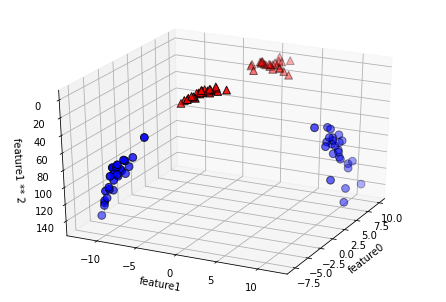

In [85]:
x_new = np.hstack([x,x[:,1:]**2]) # 3차원 공간
print(x_new)
# 3차원 공간 그래프 그리기.
from mpl_toolkits.mplot3d import Axes3D,axes3d
figure = plt.figure()
# class 0 ,class1 인것 구분하여 순서대로 그람
ax = Axes3D(figure,elev=-152,azim=-26)
mask = y == 0 
ax.scatter(x_new[mask,0],x_new[mask,1],x_new[mask,2],c='b',cmap=mglearn.cm2,
           s=60,edgecolor="k")
ax.scatter(x_new[~mask,0],x_new[~mask,1],x_new[~mask,2],c='r',marker="^",cmap=mglearn.cm2,
           s=60,edgecolor="k")
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')
plt.show()

Text(0.5, 0, 'feature1 ** 2')

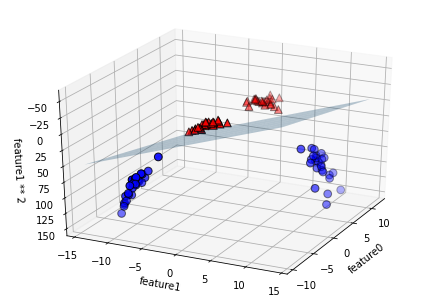

In [86]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(x_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(x_new[:, 0].min() - 2, x_new[:, 0].max() + 2, 50)
yy = np.linspace(x_new[:, 1].min() - 2, x_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(x_new[mask, 0], x_new[mask, 1], x_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(x_new[~mask, 0], x_new[~mask, 1], x_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'feacture 1')

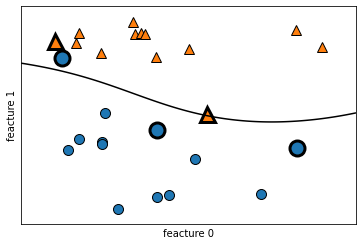

In [87]:
x,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel="rbf",C=10,gamma=0.1).fit(x,y)
mglearn.plots.plot_2d_separator(svm,x,eps=.5)
mglearn.discrete_scatter(x[:,0],x[:,1],y)
sv = svm.support_vectors_
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("feacture 0")
plt.ylabel("feacture 1")


In [88]:
breast_cancer_data = load_breast_cancer()
X_Data = pd.DataFrame(breast_cancer_data.data)
y=pd.DataFrame(breast_cancer_data.target)
x_Data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [89]:
svm_clf = SVC(kernel = 'linear')
scores = cross_val_score(svm_clf,X_Data,np.ravel(y),cv=5)
print(f'교차검증 평균: {scores.mean()}')
print(pd.DataFrame(cross_validate(svm_clf,x_Data,np.ravel(y),cv=5)))

교차검증 평균: 0.9455364073901569
   fit_time  score_time  test_score
0  0.870034    0.001995    0.947368
1  2.406966    0.002001    0.929825
2  1.397998    0.002006    0.973684
3  0.661994    0.002033    0.921053
4  1.165002    0.002013    0.955752


In [90]:
svm = SVC(kernel = "rbf")
scores = cross_val_score(svm_clf,X_Data,np.ravel(y),cv=5)
print(f'교차검증 평균 : {scores.mean()}')
print(pd.DataFrame(cross_validate(svm,x_Data,np.ravel(y),cv=5)))

교차검증 평균 : 0.9455364073901569
   fit_time  score_time  test_score
0  0.008049    0.002949    0.850877
1  0.005995    0.002004    0.894737
2  0.009000    0.003002    0.929825
3  0.009001    0.003000    0.947368
4  0.006996    0.002003    0.938053


###  svm의 cost 값에 따른 score 점수를 확인하는 방법

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X_Data,y,test_size = 0.3, random_state =42)
svm_clf = SVC(kernel = 'linear', random_state = 42)
parameters = {'C': [0.001,0.01,0.1,1,10,25,50,100]}

grid_svm = GridSearchCV(svm_clf,param_grid = parameters,cv=5)
grid_svm.fit(X_train,np.ravel(y_train))
print(grid_svm.best_params_)
print(grid_svm.best_score_)
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score',ascending = False)

{'C': 10}
0.9622784810126582


,C,mean_test_score
4,10.000,0.962278
6,50.000,0.957184
5,25.000,0.954684
7,100.000,0.954684
3,1.000,0.952184
2,0.100,0.944652
1,0.010,0.937120
0,0.001,0.934557


### cost 와 gamma 의 값에 따른 score점수

In [96]:
svm_clf = SVC(kernel = 'linear', random_state = 100)
parameters = {'C': [0.001,0.01,0.1,1,10,25,50,100],'gamma':[0.001,0.01,0.1,1,10,25,50,100]}


grid_svm = GridSearchCV(svm_clf,param_grid = parameters,cv=5)
grid_svm.fit(X_train,np.ravel(y_train))
print(grid_svm.best_params_)
print(grid_svm.best_score_) 
model = grid_svm.best_estimator_ # 최적의 파라미터로 모델 생성.
y_pred = model.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score',ascending = False)

{'C': 10, 'gamma': 0.001}
0.9622784810126582
Accuracy: 0.9707602339181286


,C,gamma,mean_test_score
32,10.000,0.001,0.962278
33,10.000,0.010,0.962278
35,10.000,1.000,0.962278
36,10.000,10.000,0.962278
37,10.000,25.000,0.962278
...,...,...,...
1,0.001,0.010,0.934557
5,0.001,25.000,0.934557
6,0.001,50.000,0.934557
7,0.001,100.000,0.934557
